In [1]:
import pandas as pd

df = pd.read_csv('dataset2_imp.csv')
df.head()

display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,154,33.6,0.127,47,y
1,0,84,82,31,125,38.2,0.233,23,n
2,0,145,72,30,154,44.2,0.630,31,y
3,0,135,68,42,250,42.3,0.365,24,y
4,1,139,62,41,480,40.7,0.536,21,n
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,n
1996,8,179,72,42,130,32.7,0.719,36,y
1997,6,85,78,30,154,31.2,0.382,42,n
1998,0,129,110,46,130,67.1,0.319,26,y


In [2]:
from sklearn.preprocessing import OneHotEncoder

# Separate the numerical and categorical columns
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_cols = ['Outcome']

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Create a datadrame for encoded categorical columns
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine the numerical and encoded categorical columns
processed_df = pd.concat([df[numeric_cols], encoded_categorical_df], axis=1)

#print(processed_df)
display(processed_df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_n,Outcome_y
0,2,138,62,35,154,33.6,0.127,47,0.0,1.0
1,0,84,82,31,125,38.2,0.233,23,1.0,0.0
2,0,145,72,30,154,44.2,0.630,31,0.0,1.0
3,0,135,68,42,250,42.3,0.365,24,0.0,1.0
4,1,139,62,41,480,40.7,0.536,21,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,1.0,0.0
1996,8,179,72,42,130,32.7,0.719,36,0.0,1.0
1997,6,85,78,30,154,31.2,0.382,42,1.0,0.0
1998,0,129,110,46,130,67.1,0.319,26,0.0,1.0


In [3]:
import matplotlib
import numpy as np
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load the Heart.csv dataset
X = processed_df.drop(['Outcome_n', 'Outcome_y'], axis=1)
Y = processed_df[['Outcome_n', 'Outcome_y']]

# Prepare the K-Fold Cross Validation
n_folds = 5  # Set the number of folds
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
evaluation_results = []

# Train with (K-fold Cross Validation)
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy")
    clf = clf.fit(x_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append(accuracy)
    
    # Print evaluation result for the current fold
    print("Accuracy for fold {}: {:.4f}".format(len(evaluation_results), accuracy))

print("Average accuracy across all folds: {:.4f}".format(np.mean(evaluation_results)))

Accuracy for fold 1: 0.7525
Accuracy for fold 2: 0.7900
Accuracy for fold 3: 0.7350
Accuracy for fold 4: 0.7500
Accuracy for fold 5: 0.7450
Average accuracy across all folds: 0.7545


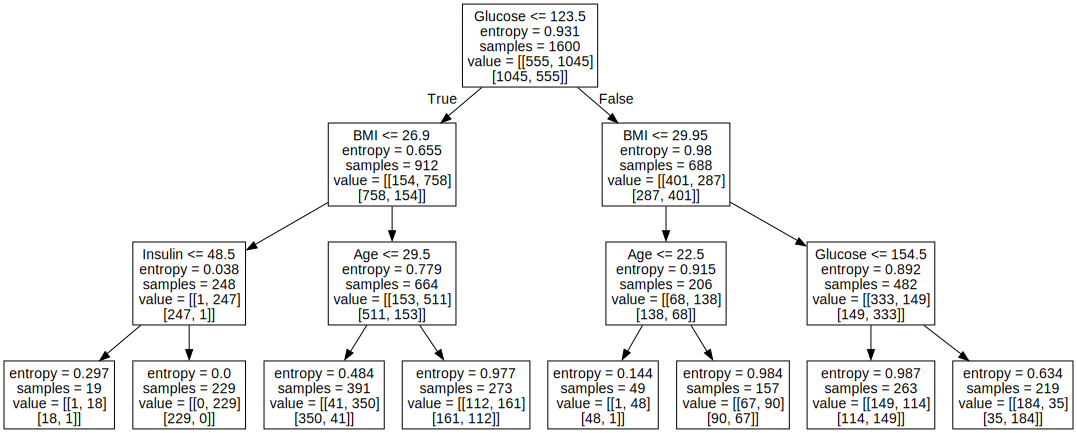

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

# Export the decision tree graph as Graphviz source code
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['False', 'True'])
graph = graphviz.Source(dot_data)
graph